In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
df = pd.read_csv('varied.csv', delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(1500, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      1500 non-null   float64
 1   x1      1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB
None


,x0,x1
0,-0.48,1.03
1,-0.77,0.85
2,-1.48,-1.91
3,-0.15,-0.14
4,0.41,0.54


In [3]:
df_data = df.copy()

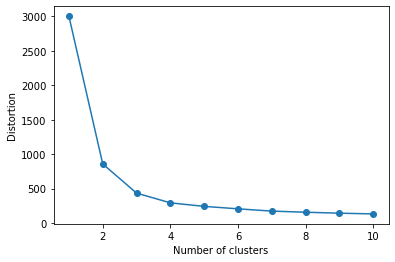

In [4]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(df_data)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [5]:
n_cls = 3
km = KMeans(n_clusters=n_cls, random_state=29)
cls = km.fit_predict(df_data)

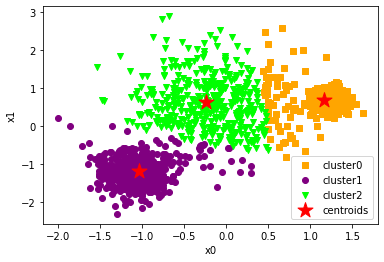

In [6]:
colors = ['orange', 'purple', 'lime', 'pink']
markers = ['s', 'o', 'v', 'd']
for i in range(n_cls):
    df_cls = df_data[ cls==i ]
    plt.scatter(df_cls['x0'], df_cls['x1'],
                c=colors[i], marker=markers[i],
                label='cluster{}'.format(i))
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*', c='red',
            label='centroids')
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

In [11]:
n_cls = 4
km = KMeans(n_clusters=n_cls, random_state=29)
cls = km.fit_predict(df_data)
np_cls = np.array(cls)
print(np.count_nonzero(np_cls == 0))
print(np.count_nonzero(np_cls == 1))
print(np.count_nonzero(np_cls == 2))
print(np.count_nonzero(np_cls == 3))
print("====================")

197
517
539
247


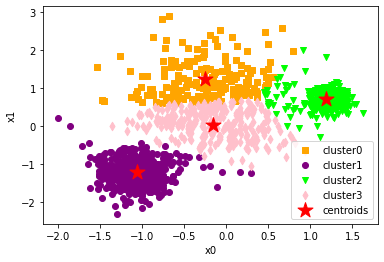

In [8]:
for i in range(n_cls):
    df_cls = df_data[ cls==i ]
    plt.scatter(df_cls['x0'], df_cls['x1'],
                c=colors[i], marker=markers[i],
                label='cluster{}'.format(i))
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*', c='red',
            label='centroids')
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

2
2
1495
1


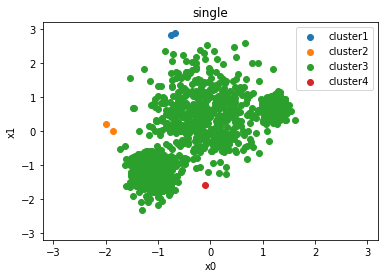

77
526
55
842


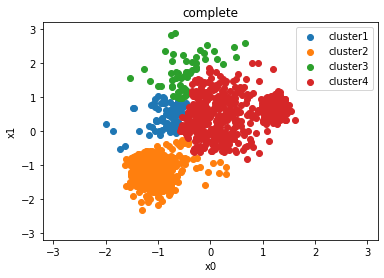

512
50
512
426


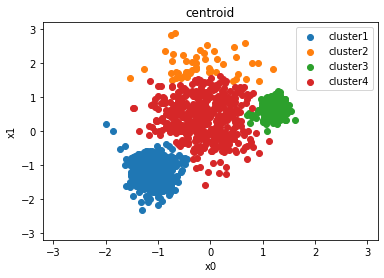

535
422
4
539


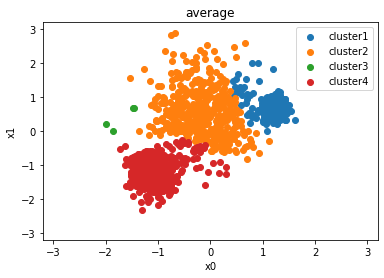

514
505
203
278


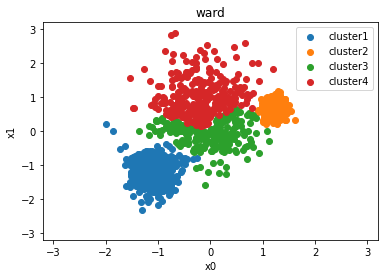

In [13]:
n_clusters = 4
for lin in ['single', 'complete', 'centroid', 'average', 'ward']:
    Z = linkage(df, method=lin, metric='euclidean')
    cls = fcluster(Z, n_clusters, criterion='maxclust')
    np_cls = np.array(cls)
    print(np.count_nonzero(np_cls == 1))
    print(np.count_nonzero(np_cls == 2))
    print(np.count_nonzero(np_cls == 3))
    print(np.count_nonzero(np_cls == 4))
    print("====================")
    for i in range(1, n_clusters+1):
        df_cls = df[ cls==i ]
        plt.title(lin)
        plt.scatter(df_cls['x0'], df_cls['x1'],
                    label='cluster{}'.format(i))
    plt.xlim(-3.2, 3.2)
    plt.ylim(-3.2, 3.2)
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.legend()
    plt.show()